# Upper West Side Restaurant Carbon Emission Mapping
This notebook analyzes and visualizes the carbon footprint of restaurants in Manhattan's Upper West Side. The workflow includes:
- **Data Import & Cleaning:** Load raw inspection and menu data, clean ZIP codes, and filter for UWS.
- **Cuisine Classification:** Assign emission levels to each restaurant based on cuisine type and typical ingredients.
- **Mapping & Visualization:**
    - Interactive map of all restaurants, colored by cuisine.
    - Graduated symbol map showing emission levels by marker size and color.
    - Layered map for toggling emission levels.
    - Combined map for filtering by emission and cuisine type.
- **Export:** Each map is saved as an HTML file for interactive exploration.

In [44]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install streamlit_folium 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [46]:
# Import all required libraries once at the top
import pandas as pd
import folium
from folium.plugins import MarkerCluster, Search, FeatureGroupSubGroup
import streamlit as st
import pandas as pd
import folium
from streamlit_folium import st_folium

2025-08-07 13:40:12.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [47]:
# Read CSV, force CAMIS and ZIPCODE to string to avoid losing leading zeros
dohmh_df = pd.read_csv(
    "/Users/sunni/Desktop/mapping final/raw/DOHMH_New_York_City_Restaurant_Inspection_Results_20250805.csv",
    dtype={"ZIPCODE": str},
)
dohmh_df["ZIPCODE"] = dohmh_df["ZIPCODE"].str.strip()

# Common ZIP codes for Upper West Side
uws_zipcodes = ["10023", "10024", "10025", "10069"]

In [4]:
# Read cleaned restaurant data
df = pd.read_csv("/Users/sunni/Desktop/mapping final/_archive/uws_dohmh_cleaned.csv")

# Create a map centered on Upper West Side
uws_center = [40.7870, -73.9754]

# Cuisine types and color mapping
cuisine_types = df["CUISINE DESCRIPTION"].dropna().unique()
color_palette = [
    "red",
    "blue",
    "green",
    "purple",
    "orange",
    "darkred",
    "lightred",
    "beige",
    "darkblue",
    "darkgreen",
    "cadetblue",
    "darkpurple",
    "white",
    "pink",
    "lightblue",
    "lightgreen",
    "gray",
    "black",
    "lightgray",
]
cuisine_color_map = {
    cuisine: color_palette[i % len(color_palette)]
    for i, cuisine in enumerate(cuisine_types)
}

# --- Cuisine Filter Map (Folium, Interactive) ---
# Filter restaurants by cuisine and view on a folium map
import ipywidgets as widgets
from IPython.display import display, clear_output


def show_map(selected_cuisine):
    m = folium.Map(location=uws_center, zoom_start=14)
    for idx, row in df.iterrows():
        name = row["DBA"]
        cuisine = row["CUISINE DESCRIPTION"]
        lat = row["Latitude"]
        lon = row["Longitude"]
        if pd.notnull(lat) and pd.notnull(lon):
            if selected_cuisine == "All" or cuisine == selected_cuisine:
                color = cuisine_color_map.get(cuisine, "blue")
                popup_text = f"<b>{name}</b><br>{cuisine}"
                folium.Marker(
                    location=[lat, lon],
                    popup=popup_text,
                    icon=folium.Icon(color=color, icon="cutlery", prefix="fa"),
                    tooltip=name,
                ).add_to(m)
    display(m)


cuisine_dropdown = widgets.Dropdown(
    options=["All"] + list(cuisine_types), value="All", description="Filter cuisine:"
)
output = widgets.Output()


def on_change(change):
    if change["type"] == "change" and change["name"] == "value":
        with output:
            clear_output(wait=True)
            show_map(change["new"])


cuisine_dropdown.observe(on_change)
display(cuisine_dropdown, output)

# Show initial map
with output:
    show_map("All")

NameError: name 'pd' is not defined

In [2]:
# Read cleaned restaurant data
uws_df = pd.read_csv(
    "/Users/sunni/Desktop/mapping final/_archive/uws_dohmh_cleaned.csv"
)

# Get all cuisine types
cuisines = uws_df["CUISINE DESCRIPTION"].dropna().unique()

# Sort cuisine types alphabetically
cuisines_sorted = sorted(cuisines)

pd.set_option("display.max_rows", None)
uws_df["CUISINE DESCRIPTION"].dropna().unique()

NameError: name 'pd' is not defined

In [7]:
emission_category = {
    "Very High": [
        "Steakhouse",
        "Barbecue",
        "Soul Food",
        "Peruvian",
        "Seafood",
        "German",
    ],
    "High": [
        "American",
        "Italian",
        "Mexican",
        "Latin American",
        "French",
        "Hamburgers",
        "Chicken",
        "Irish",
        "Sandwiches",
        "Hotdogs",
        "Jewish/Kosher",
        "Hawaiian",
        "New American",
    ],
    "Medium": [
        "Japanese",
        "Chinese",
        "Thai",
        "Korean",
        "Indian",
        "Middle Eastern",
        "Spanish",
        "Greek",
        "Pakistani",
        "Tex-Mex",
        "Eastern European",
        "Southeast Asian",
        "Chinese/Japanese",
        "Chinese/Cuban",
        "Sandwiches/Salads/Mixed Buffet",
        "Fusion",
        "Asian/Asian Fusion",
        "Mediterranean",
    ],
    "Low": [
        "Vegan",
        "Vegetarian",
        "Salads",
        "Coffee/Tea",
        "Juice, Smoothies, Fruit Salads",
        "Bakery Products/Desserts",
        "Donuts",
        "Bagels/Pretzels",
        "Frozen Desserts",
        "Soups/Salads/Sandwiches",
        "Bottled Beverages",
        "Pizza",
        "Other",
        "Australian",
    ],
}

In [1]:
# Function to classify emission level by cuisine
def classify_emission(cuisine):
    for level, cuisines in emission_category.items():
        if cuisine in cuisines:
            return level
    return "Unknown"


# Add Emission_Level column
uws_df["Emission_Level"] = uws_df["CUISINE DESCRIPTION"].apply(classify_emission)

# Remove rows that cannot be classified
uws_df = uws_df[uws_df["Emission_Level"] != "Unknown"].copy()

# Save to new file
uws_df.to_csv(
    "/Users/sunni/Desktop/mapping final/data/uws_dohmh_with_emission.csv", index=False
)

print("✅ Emission level classified, unknowns removed, and file saved.")

NameError: name 'uws_df' is not defined

In [ ]:
# Load the data
df = pd.read_csv("/Users/sunni/Desktop/mapping final/data/uws_dohmh_with_emission.csv")

# Create a map centered on Upper West Side
uws_center = [40.7870, -73.9754]
m = folium.Map(location=uws_center, zoom_start=14)

# --- Graduated Symbol Map: Emission Level by Marker Size & Color (Folium) ---
# Each marker's color and size represents emission level

# Define colors for emission levels (use Folium supported colors)
emission_colors = {
    "Very High": "red",
    "High": "orange",
    "Medium": "beige",  # changed from yellow to beige
    "Low": "green",
}

# Add markers with color by emission level
marker_cluster = MarkerCluster().add_to(m)
for idx, row in df.iterrows():
    lat = row.get("Latitude")
    lon = row.get("Longitude")
    name = row.get("DBA", "Unknown")
    cuisine = row.get("CUISINE DESCRIPTION", "Unknown")
    emission = row.get("Emission_Level", "Unknown")
    color = emission_colors.get(emission, "gray")
    if pd.notnull(lat) and pd.notnull(lon):
        # Debug print for each marker
        popup_text = f"<b>{name}</b><br>{cuisine}<br>Emission: {emission}"
        folium.Marker(
            location=[lat, lon],
            popup=popup_text,
            icon=folium.Icon(color=color, icon="cutlery", prefix="fa"),
            tooltip=name,
        ).add_to(marker_cluster)

# Export the map to HTML file
map_path = "/Users/sunni/Desktop/mapping final/uws_emission_map.html"
m.save(map_path)
print(f"✅ Map exported and saved to: {map_path}")

✅ Map exported and saved to: /Users/sunni/Desktop/mapping final/uws_emission_map.html


In [ ]:
# Load the data
df = pd.read_csv("/Users/sunni/Desktop/mapping final/data/uws_dohmh_with_emission.csv")

# Emission levels and colors
emission_layers = {
    "Very High": {"color": "red", "layer": None},
    "High": {"color": "orange", "layer": None},
    "Medium": {"color": "yellow", "layer": None},
    "Low": {"color": "green", "layer": None},
}

# Create map
uws_center = [40.7870, -73.9754]
m_layered = folium.Map(location=uws_center, zoom_start=14)

# --- Layered Emission Map: Toggle Emission Levels (Folium) ---
# Toggle layers for each emission level
# Create a layer for each emission level
for level, info in emission_layers.items():
    layer = folium.FeatureGroup(name=level)
    emission_layers[level]["layer"] = layer
    m_layered.add_child(layer)

# Add circle markers to corresponding layers
for idx, row in df.iterrows():
    lat = row.get("Latitude")
    lon = row.get("Longitude")
    name = row.get("DBA", "Unknown")
    cuisine = row.get("CUISINE DESCRIPTION", "Unknown")
    emission = row.get("Emission_Level", "Unknown")
    color = emission_layers.get(emission, {"color": "gray"})["color"]
    if pd.notnull(lat) and pd.notnull(lon) and emission in emission_layers:
        popup_text = f"<b>{name}</b><br>{cuisine}<br>Emission: {emission}"
        folium.CircleMarker(
            location=[lat, lon],
            radius=8,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
            popup=popup_text,
            tooltip=name,
        ).add_to(emission_layers[emission]["layer"])

# Add layer control
folium.LayerControl(collapsed=False).add_to(m_layered)

# Export layered map to HTML file
layered_map_path = "/Users/sunni/Desktop/mapping final/uws_emission_layered_map.html"
m_layered.save(layered_map_path)
print(f"✅ Layered map exported and saved to: {layered_map_path}")

✅ Layered map exported and saved to: /Users/sunni/Desktop/mapping final/uws_emission_layered_map.html


In [ ]:
# --- Combined Filter Map: Filter by Emission & Cuisine (Folium, Interactive) ---
# Filter restaurants by emission and cuisine

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import folium

# Load the data (if not already loaded)
df = pd.read_csv("/Users/sunni/Desktop/mapping final/data/uws_dohmh_with_emission.csv")

# Get unique emission levels and cuisine types
emission_levels = ["All"] + list(df["Emission_Level"].dropna().unique())
cuisine_types = ["All"] + list(df["CUISINE DESCRIPTION"].dropna().unique())

# Define colors for emission levels
emission_colors = {
    "Very High": "red",
    "High": "orange",
    "Medium": "beige",
    "Low": "green",
}

# Dropdown widgets for filtering
emission_dropdown = widgets.Dropdown(
    options=emission_levels, value="All", description="Emission:"
)
cuisine_dropdown = widgets.Dropdown(
    options=cuisine_types, value="All", description="Cuisine:"
)
output = widgets.Output()


# Function to show the filtered map
def show_combined_map(selected_emission, selected_cuisine):
    m = folium.Map(location=[40.7870, -73.9754], zoom_start=14)
    for idx, row in df.iterrows():
        emission = row["Emission_Level"]
        cuisine = row["CUISINE DESCRIPTION"]
        lat = row["Latitude"]
        lon = row["Longitude"]
        name = row["DBA"]
        if pd.notnull(lat) and pd.notnull(lon):
            if (selected_emission == "All" or emission == selected_emission) and (
                selected_cuisine == "All" or cuisine == selected_cuisine
            ):
                color = emission_colors.get(emission, "gray")
                popup_text = f"<b>{name}</b><br>{cuisine}<br>Emission: {emission}"
                folium.Marker(
                    location=[lat, lon],
                    popup=popup_text,
                    icon=folium.Icon(color=color, icon="cutlery", prefix="fa"),
                    tooltip=name,
                ).add_to(m)
    display(m)


# Callback for widget changes
def on_combined_change(change):
    with output:
        clear_output(wait=True)
        show_combined_map(emission_dropdown.value, cuisine_dropdown.value)


emission_dropdown.observe(on_combined_change, names="value")
cuisine_dropdown.observe(on_combined_change, names="value")
display(widgets.HBox([emission_dropdown, cuisine_dropdown]), output)

# Show initial map
with output:
    show_combined_map("All", "All")

Output()

## Emission and Cuisine Analysis: Summary Statistics and Visualizations

This section provides summary statistics and visualizations to help understand the distribution of emission levels and cuisine types among Upper West Side restaurants.

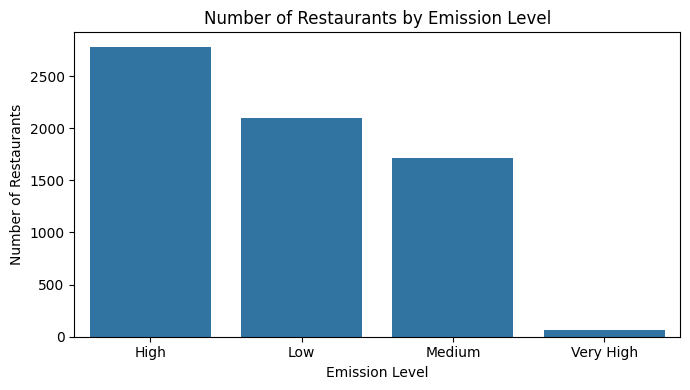

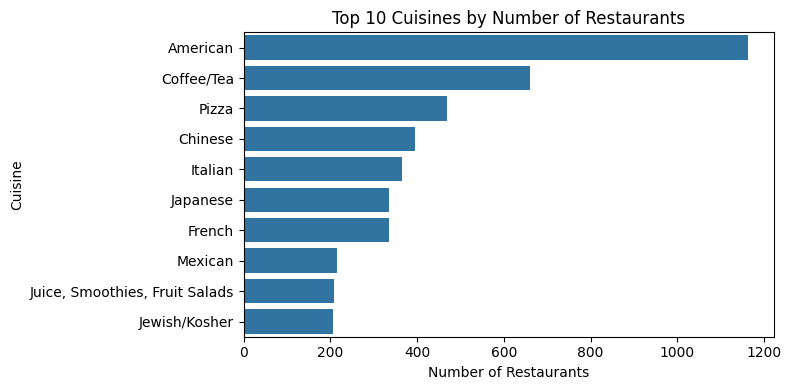

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Count of restaurants by emission level
emission_counts = df['Emission_Level'].value_counts().sort_index()
plt.figure(figsize=(7,4))
sns.barplot(x=emission_counts.index, y=emission_counts.values)
plt.title('Number of Restaurants by Emission Level')
plt.xlabel('Emission Level')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()
plt.close()

# Top 10 cuisines by count
cuisine_counts = df['CUISINE DESCRIPTION'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values)
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()
plt.close()

Emission by Cuisine and ZIP Code

1. **Emission Level by Cuisine Type:** Which cuisines are most associated with high or low emissions?
2. **Emission Level by ZIP Code:** Are there spatial patterns in emission levels across the Upper West Side?
3. **Correlation between Emission Level and Restaurant Count per ZIP Code:** Does a higher number of restaurants in a ZIP code relate to higher emissions?

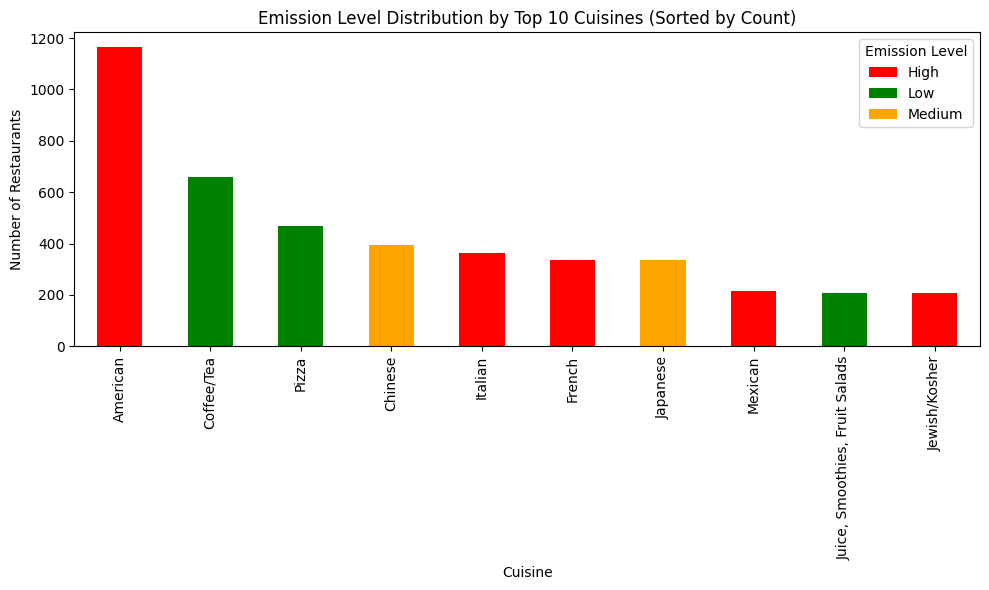

In [19]:
# Emission Level by Cuisine Type (Top 10 Cuisines, Sorted by Count)
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
top_cuisines = df["CUISINE DESCRIPTION"].value_counts().head(10).index
emission_cuisine = (
    df[df["CUISINE DESCRIPTION"].isin(top_cuisines)]
    .groupby(["CUISINE DESCRIPTION", "Emission_Level"])
    .size()
    .unstack(fill_value=0)
)

# Sort cuisines by total restaurant count (descending)
emission_cuisine["Total"] = emission_cuisine.sum(axis=1)
emission_cuisine = emission_cuisine.sort_values("Total", ascending=False)
emission_cuisine = emission_cuisine.drop(columns="Total")

# Plot stacked bar chart
emission_cuisine.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["red", "green", "orange", "purple"],
)
plt.title("Emission Level Distribution by Top 10 Cuisines (Sorted by Count)")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.legend(title="Emission Level")
plt.tight_layout()
plt.show()

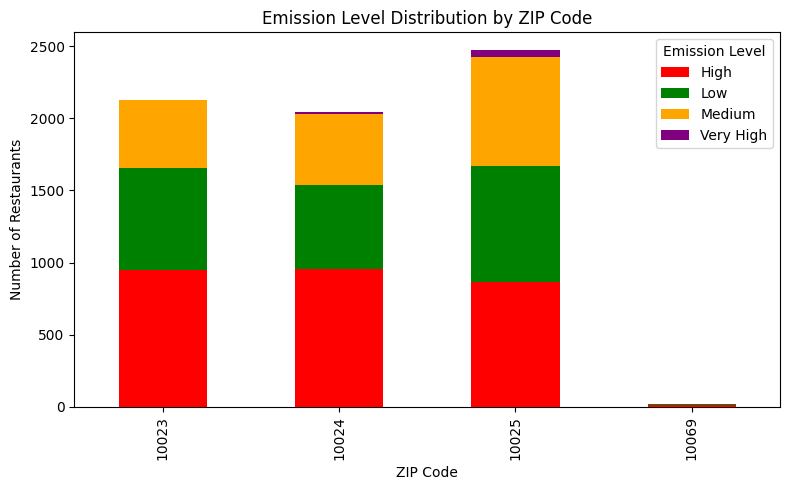

In [20]:
# Emission Level by ZIP Code
import matplotlib.pyplot as plt

# Prepare data
zip_emission = df.groupby(["ZIPCODE", "Emission_Level"]).size().unstack(fill_value=0)

# Plot stacked bar chart
zip_emission.plot(
    kind="bar", stacked=True, figsize=(8, 5), color=["red", "green", "orange", "purple"]
)
plt.title("Emission Level Distribution by ZIP Code")
plt.xlabel("ZIP Code")
plt.ylabel("Number of Restaurants")
plt.legend(title="Emission Level")
plt.tight_layout()
plt.show()

In [ ]:
# --- ZIP Code Emission Map: Average Emission by ZIP (Folium) ---
# Color intensity represents average emission per ZIP code

# Plot a folium map with color intensity representing average emission per ZIP code
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Center on Upper West Side
uws_center = [40.7870, -73.9754]
m_zipcolor = folium.Map(location=uws_center, zoom_start=13)

# Map emission level to numeric value
emission_level_map = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
df["Emission_Level_Num"] = df["Emission_Level"].map(emission_level_map)

# Get ZIP code centroids, counts, and average emission
zip_centroids = df.groupby("ZIPCODE")[["Latitude", "Longitude"]].mean()
zip_counts = df["ZIPCODE"].value_counts()
zip_avg_emission = df.groupby("ZIPCODE")["Emission_Level_Num"].mean()
zipcodes = zip_centroids.index.tolist()

# Normalize emission for color mapping
min_em = zip_avg_emission.min()
max_em = zip_avg_emission.max()
norm = mcolors.Normalize(vmin=min_em, vmax=max_em)
colormap = cm.get_cmap("YlOrRd")

# Add a marker for each ZIP code, color by avg emission, with small circles
for i, (zipcode, row) in enumerate(zip_centroids.iterrows()):
    count = zip_counts.get(zipcode, 0)
    avg_em = zip_avg_emission.get(zipcode, np.nan)
    color = (
        mcolors.to_hex(colormap(norm(avg_em))) if not np.isnan(avg_em) else "#cccccc"
    )
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=7,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(
            f"ZIP Code: {zipcode}<br>"
            f"Count: {count}<br>"
            f"Avg Emission Level: {avg_em:.2f}",
            parse_html=True,
        ),
    ).add_to(m_zipcolor)

m_zipcolor

/var/folders/md/f_q4yfjx7_l68x_59s_rf6k00000gn/T/ipykernel_20320/3566470865.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("YlOrRd")


In [ ]:
# --- Interactive 3D Map: Filter by Cuisine & Emission (Lonboard) ---
# 3D map with dropdowns to filter by cuisine and emission level

# --- Interactive 3D Map: Restaurants by Emission Level (Filterable) ---
import geopandas as gpd
from shapely.geometry import Point
from lonboard._map import Map
from lonboard._layer import ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ensure Emission_Level_Num exists
if "Emission_Level_Num" not in df.columns:
    emission_level_map = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
    df["Emission_Level_Num"] = df["Emission_Level"].map(emission_level_map)

# Dropdown options
cuisine_options = ["All"] + sorted(df["CUISINE DESCRIPTION"].dropna().unique())
emission_options = ["All"] + ["Low", "Medium", "High", "Very High"]
cuisine_dropdown = widgets.Dropdown(
    options=cuisine_options, value="All", description="Cuisine:"
)
emission_dropdown = widgets.Dropdown(
    options=emission_options, value="All", description="Emission:"
)
output = widgets.Output()


def update_map(change=None):
    with output:
        clear_output(wait=True)
        # Filter dataframe
        filtered = df.copy()
        if cuisine_dropdown.value != "All":
            filtered = filtered[
                filtered["CUISINE DESCRIPTION"] == cuisine_dropdown.value
            ]
        if emission_dropdown.value != "All":
            filtered = filtered[filtered["Emission_Level"] == emission_dropdown.value]
        rest_df = filtered.dropna(
            subset=["Latitude", "Longitude", "Emission_Level_Num"]
        ).copy()
        if rest_df.empty:
            print("No data for selection.")
            return
        rest_df["geometry"] = rest_df.apply(
            lambda row: Point(row["Longitude"], row["Latitude"]), axis=1
        )
        gdf_rest = gpd.GeoDataFrame(rest_df, geometry="geometry", crs="epsg:4326")
        normalizer = LogNorm(1, gdf_rest["Emission_Level_Num"].max(), clip=True)
        normalized_em = normalizer(gdf_rest["Emission_Level_Num"])
        radii = gdf_rest["Emission_Level_Num"] * 30
        layer = ScatterplotLayer.from_geopandas(
            gdf_rest[["Emission_Level_Num", "geometry"]],
            get_fill_color=apply_continuous_cmap(normalized_em, cmap=PuRd_9),
            get_radius=radii.values,
            pickable=True,
            auto_highlight=True,
            opacity=0.85,
            filled=True,
            radius_scale=1,
        )
        m = Map(layer)
        display(m)


cuisine_dropdown.observe(update_map, names="value")
emission_dropdown.observe(update_map, names="value")
display(widgets.HBox([cuisine_dropdown, emission_dropdown]))
display(output)
update_map()

Output()

In [41]:
# Ensure Emission_Level_Num exists
if "Emission_Level_Num" not in df.columns:
    emission_level_map = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
    df["Emission_Level_Num"] = df["Emission_Level"].map(emission_level_map)

# Prepare GeoDataFrame for restaurants
rest_df = df.dropna(subset=["Latitude", "Longitude", "Emission_Level_Num"]).copy()
rest_df["geometry"] = rest_df.apply(
    lambda row: Point(row["Longitude"], row["Latitude"]), axis=1
)
gdf_rest = gpd.GeoDataFrame(rest_df, geometry="geometry", crs="epsg:4326")

# Normalize emission level for color mapping and size
normalizer = LogNorm(1, gdf_rest["Emission_Level_Num"].max(), clip=True)
normalized_em = normalizer(gdf_rest["Emission_Level_Num"])

# Add a radius column for point size
radii = gdf_rest["Emission_Level_Num"] * 30  # scale size by emission

# Show 3D lonboard map with fixed opacity
layer = ScatterplotLayer.from_geopandas(
    gdf_rest[["Emission_Level_Num", "geometry"]],
    get_fill_color=apply_continuous_cmap(normalized_em, cmap=PuRd_9),
    get_radius=radii.values,  # Pass numpy array, not string
    pickable=True,
    auto_highlight=True,
    opacity=0.85,
    filled=True,
    radius_scale=1,
)
m = Map(layer)
display(m)

Map(layers=[ScatterplotLayer(auto_highlight=True, filled=True, get_fill_color=<pyarrow.lib.FixedSizeListArray …